<a href="https://colab.research.google.com/github/MAlHafiz/Pembelajaran-Mesin_Muhammad-Al-Hafiz_2211533010/blob/main/Praktikum_ML_Logistic_Regression_Muhammad_Al_Hafiz.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Import libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
# Load the dataset
df = pd.read_csv('framingham.csv')

In [20]:
print(df.head())

   male  age  education  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0     1   39        4.0              0         0.0     0.0                0   
1     0   46        2.0              0         0.0     0.0                0   
2     1   48        1.0              1        20.0     0.0                0   
3     0   61        3.0              1        30.0     0.0                0   
4     0   46        3.0              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2 

In [21]:
# Separate features (X) and target variable (y)
X = df.drop('TenYearCHD', axis=1)
y = df['TenYearCHD']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
# Impute missing values
imputer = SimpleImputer(strategy='mean')  # You can choose other strategies as well
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [24]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

In [25]:
# Create a logistic regression model
model = LogisticRegression(random_state=42)

In [26]:
# Train the model
model.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [28]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [29]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy}')
print('Confusion Matrix:')
print(conf_matrix)
print('Classification Report:')
print(classification_rep)

Accuracy: 0.8573113207547169
Confusion Matrix:
[[718   6]
 [115   9]]
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.99      0.92       724
           1       0.60      0.07      0.13       124

    accuracy                           0.86       848
   macro avg       0.73      0.53      0.53       848
weighted avg       0.82      0.86      0.81       848



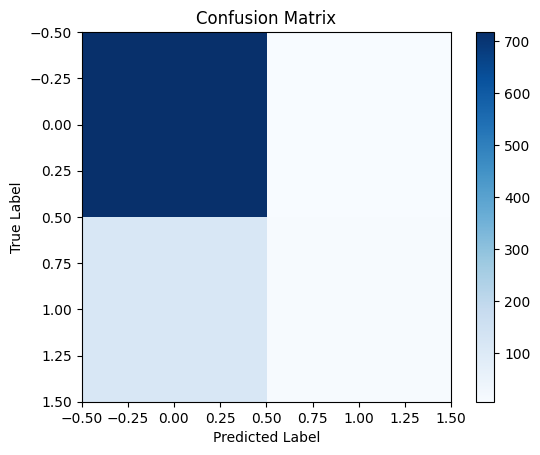

In [30]:
# Plot Confusion Matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve, auc

conf_matrix = confusion_matrix(y_test, y_pred)
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()